<a href="https://colab.research.google.com/github/odenyirechristopher/Week-9-Data-Streaming-with-Kafka---Independent-Project/blob/main/Week_9_Data_Streaming_with_Kafka_Independent_Project_Emmanuel_Anyira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the required libraries such as pandas and matplotlib using pip install before running the code.

In [51]:
!pip install pandas
!pip install matplotlib
!pip install kafka-python
!pip install confluent_kafka

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
from confluent_kafka import Producer

# Kafka broker(s) configuration
bootstrap_servers = 'pkc-q283m.af-south-1.aws.confluent.cloud:9092'  # Update with your Kafka broker(s) address

# Kafka topic to produce the data
topic = 'mobile-money-transactions'

# Create a Kafka producer instance
producer = Producer({
    'bootstrap.servers': bootstrap_servers,
    'security.protocol': 'SASL_SSL',
    'sasl.mechanisms': 'PLAIN',
    'sasl.username': 'IIK7UFPQVGUED4J7',
    'sasl.password': 'aTn0z2Tm9pc6gz7Yn4iz1PyRCPcw4tPLeKz+NjHfuR/eL23PG15Koc+XOixogec6'
})

# Produce data to the Kafka topic
data = {
    "transaction_id": "12345",
    "sender_phone_number": "256777192516",
    "receiver_phone_number": "256772961935",
    "transaction_amount": 100000,
    "transaction_time": "2023-04-19 12:00:00"
}

producer.produce(topic, value=str(data))

# Flush the producer to ensure all messages are delivered
producer.flush()

# Close the producer
#producer.close()


0

In [53]:
data_list = []

# First record
data = {
    "transaction_id": "12345",
    "sender_phone_number": "256777192516",
    "receiver_phone_number": "256772961935",
    "transaction_amount": 100000,
    "transaction_time": "2023-04-19 12:00:00"
}
data_list.append(data)

# Second record
data = {
    "transaction_id": "54321",
    "sender_phone_number": "256777192516",
    "receiver_phone_number": "256772961935",
    "transaction_amount": 50000,
    "transaction_time": "2023-04-20 09:30:00"
}
data_list.append(data)

# Third record
data = {
    "transaction_id": "98765",
    "sender_phone_number": "256777192516",
    "receiver_phone_number": "256772961935",
    "transaction_amount": 250000,
    "transaction_time": "2023-04-21 15:45:00"
}
data_list.append(data)

# Fourth record
data = {
    "transaction_id": "24680",
    "sender_phone_number": "256777192516",
    "receiver_phone_number": "256772961935",
    "transaction_amount": 150000,
    "transaction_time": "2023-04-22 10:20:00"
}
data_list.append(data)

# Fifth record
data = {
    "transaction_id": "13579",
    "sender_phone_number": "256777192516",
    "receiver_phone_number": "256772961935",
    "transaction_amount": 75000,
    "transaction_time": "2023-04-23 18:00:00"
}
data_list.append(data)

# Produce the records to the Kafka topic
for data in data_list:
    producer.produce(topic, json.dumps(data).encode('utf-8'))

producer.flush()


0

In [35]:
from confluent_kafka import Producer
import json

# Kafka broker(s) configuration
bootstrap_servers = 'pkc-q283m.af-south-1.aws.confluent.cloud:9092'  # Update with your Kafka broker(s) address

# Kafka topic to produce the data
topic = 'mobile-money-transactions'

# Create a Kafka producer instance
producer = Producer({
    'bootstrap.servers': bootstrap_servers,
    'security.protocol': 'SASL_SSL',
    'sasl.mechanisms': 'PLAIN',
    'sasl.username': 'IIK7UFPQVGUED4J7',
    'sasl.password': 'aTn0z2Tm9pc6gz7Yn4iz1PyRCPcw4tPLeKz+NjHfuR/eL23PG15Koc+XOixogec6'
})

# Generate and send distinct records to the Kafka topic
records = [
    {
        "transaction_id": "12345",
        "sender_phone_number": "256777123456",
        "receiver_phone_number": "256772987654",
        "transaction_amount": 100000,
        "transaction_time": "2023-04-19 12:00:00"
    },
    {
        "transaction_id": "67890",
        "sender_phone_number": "256777987654",
        "receiver_phone_number": "256772123456",
        "transaction_amount": 50000,
        "transaction_time": "2023-04-20 10:30:00"
    },
    {
        "transaction_id": "13579",
        "sender_phone_number": "256770123456",
        "receiver_phone_number": "256772987654",
        "transaction_amount": 75000,
        "transaction_time": "2023-04-21 15:45:00"
    },
    # Add more distinct records here if needed
]

for i, record in enumerate(records):
    # Convert the record to JSON
    json_record = json.dumps(record)
    
    # Produce the JSON record to the Kafka topic
    producer.produce(topic, key=str(i), value=json_record)

# Flush any remaining messages
producer.flush()

# Close the producer
#producer.close()


0

In [54]:
from confluent_kafka import Consumer
import json

# Kafka broker(s) configuration
bootstrap_servers = 'pkc-q283m.af-south-1.aws.confluent.cloud:9092'  # Update with your Kafka broker(s) address

# Kafka topic to consume the data
topic = 'mobile-money-transactions'

# Create a Kafka consumer instance
consumer = Consumer({
    'bootstrap.servers': bootstrap_servers,
    'security.protocol': 'SASL_SSL',
    'sasl.mechanisms': 'PLAIN',
    'sasl.username': 'IIK7UFPQVGUED4J7',
    'sasl.password': 'aTn0z2Tm9pc6gz7Yn4iz1PyRCPcw4tPLeKz+NjHfuR/eL23PG15Koc+XOixogec6',
    'group.id': 'my-consumer-group',  # Consumer group ID
    'auto.offset.reset': 'earliest'  # Start consuming from the beginning of the topic
})

# Subscribe to the Kafka topic
consumer.subscribe([topic])

# Process and analyze messages
while True:
    msg = consumer.poll(1.0)  # Poll for new messages with a timeout
    if msg is None:
        continue
    if msg.error():
        print("Consumer error: {}".format(msg.error()))
        continue
    
    # Process the received message
    data = msg.value().decode('utf-8')
    print("Received data: {}".format(data))
    
    # Convert the message data to a dictionary
    try:
        transaction = json.loads(data)
    except json.JSONDecodeError as e:
        print("Error decoding JSON data: {}".format(e))
        continue
    
    # Perform data processing and analysis
    transaction_id = transaction.get('transaction_id')
    sender_phone_number = transaction.get('sender_phone_number')
    receiver_phone_number = transaction.get('receiver_phone_number')
    transaction_amount = transaction.get('transaction_amount')
    transaction_time = transaction.get('transaction_time')
    
    # Example data processing: Print transaction details
    print("Transaction ID: {}".format(transaction_id))
    print("Sender Phone Number: {}".format(sender_phone_number))
    print("Receiver Phone Number: {}".format(receiver_phone_number))
    print("Transaction Amount: {}".format(transaction_amount))
    print("Transaction Time: {}".format(transaction_time))
    print("-----------")
    
    consumer.commit()  # Commit the offset to mark the message as processed

# Close the consumer
consumer.close()



Received data: {"transaction_id": "12345", "sender_phone_number": "256777192516", "receiver_phone_number": "256772961935", "transaction_amount": 100000, "transaction_time": "2023-04-19 12:00:00"}
Transaction ID: 12345
Sender Phone Number: 256777192516
Receiver Phone Number: 256772961935
Transaction Amount: 100000
Transaction Time: 2023-04-19 12:00:00
-----------
Received data: {"transaction_id": "54321", "sender_phone_number": "256777192516", "receiver_phone_number": "256772961935", "transaction_amount": 50000, "transaction_time": "2023-04-20 09:30:00"}
Transaction ID: 54321
Sender Phone Number: 256777192516
Receiver Phone Number: 256772961935
Transaction Amount: 50000
Transaction Time: 2023-04-20 09:30:00
-----------
Received data: {"transaction_id": "98765", "sender_phone_number": "256777192516", "receiver_phone_number": "256772961935", "transaction_amount": 250000, "transaction_time": "2023-04-21 15:45:00"}
Transaction ID: 98765
Sender Phone Number: 256777192516
Receiver Phone Numbe

KeyboardInterrupt: ignored

Total Transaction Amount: 500000


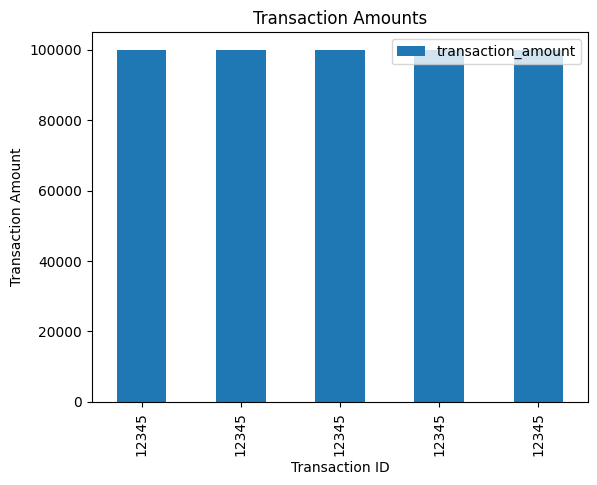

In [55]:
# Define the desired number of messages to consume
num_messages = 10

# Consume messages and collect transaction data
for _ in range(num_messages):
    msg = consumer.poll(1.0)  # Poll for new messages with a timeout
    if msg is None:
        continue
    if msg.error():
        if msg.error().code() == KafkaError._PARTITION_EOF:
            break
        else:
            print("Consumer error: {}".format(msg.error()))
            continue

    # Process the received message
    data = msg.value().decode('utf-8')

    # Convert the message data to a dictionary
    try:
        transaction = json.loads(data)
    except json.JSONDecodeError as e:
        print("Error decoding JSON data: {}".format(e))
        continue

    # Extract transaction data and append to the respective lists
    transaction_ids.append(transaction['transaction_id'])
    sender_phone_numbers.append(transaction['sender_phone_number'])
    receiver_phone_numbers.append(transaction['receiver_phone_number'])
    transaction_amounts.append(transaction['transaction_amount'])
    transaction_times.append(transaction['transaction_time'])

    counter += 1  # Increment the counter

# Create a DataFrame from the collected transaction data
data = pd.DataFrame({
    'transaction_id': transaction_ids,
    'sender_phone_number': sender_phone_numbers,
    'receiver_phone_number': receiver_phone_numbers,
    'transaction_amount': transaction_amounts,
    'transaction_time': transaction_times
})

# Perform data cleaning, aggregation, calculations, and visualizations

# Example: Calculate total transaction amount
total_amount = data['transaction_amount'].sum()
print("Total Transaction Amount: {}".format(total_amount))

# Example: Create a bar chart of transaction amounts
if not data.empty:
    data.plot(kind='bar', x='transaction_id', y='transaction_amount')
    plt.xlabel('Transaction ID')
    plt.ylabel('Transaction Amount')
    plt.title('Transaction Amounts')
    plt.show()




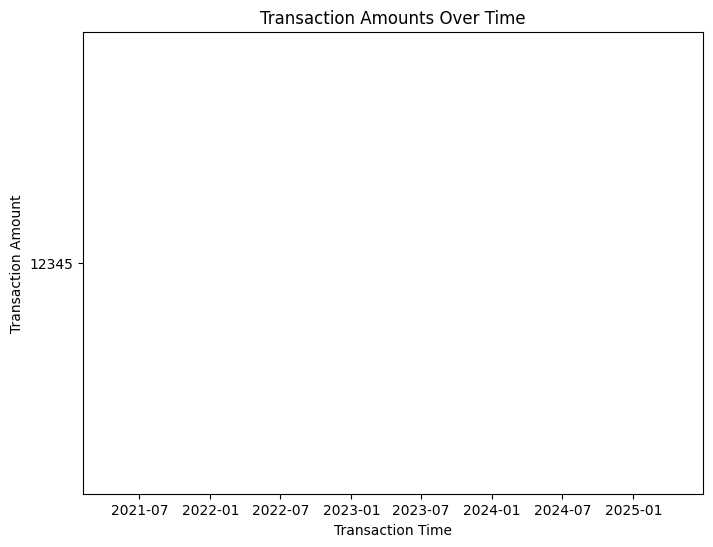

In [57]:

# Example: Create a bar chart of transaction amounts
if not data.empty:
    plt.figure(figsize=(8, 6))
    data['transaction_time'] = pd.to_datetime(data['transaction_time'])  # Convert transaction_time to datetime
    data = data.sort_values('transaction_time')  # Sort data by transaction_time
    plt.plot(data['transaction_time'], data['transaction_id'])
    plt.xlabel('Transaction Time')
    plt.ylabel('Transaction Amount')
    plt.title('Transaction Amounts Over Time')
    plt.show()

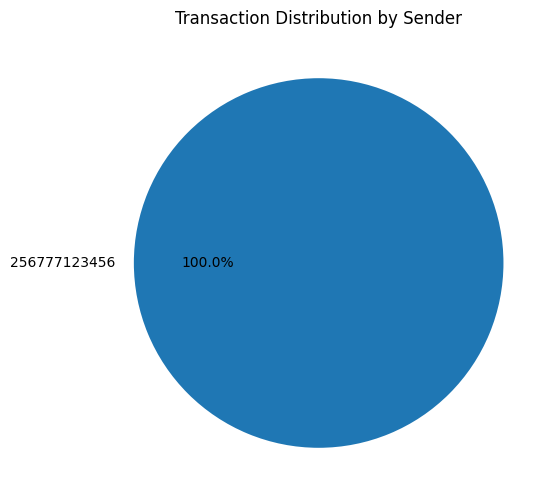

In [42]:
# Example: Create a bar chart of transaction amounts
if not data.empty:
    plt.figure(figsize=(8, 6))
    sender_counts = data['sender_phone_number'].value_counts()
    plt.pie(sender_counts, labels=sender_counts.index, autopct='%1.1f%%')
    plt.title('Transaction Distribution by Sender')
    plt.show()

else:
    print("No data available to visualize.")

Total Transaction Amount: 500000


<Figure size 800x600 with 0 Axes>

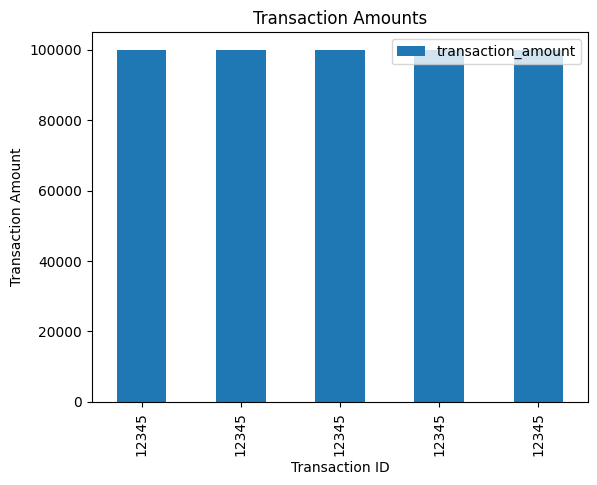

In [43]:
# Perform data cleaning, aggregation, calculations, and visualizations

# Example: Calculate total transaction amount
total_amount = data['transaction_amount'].sum()
print("Total Transaction Amount: {}".format(total_amount))

# Example: Create a bar chart of transaction amounts
if not data.empty:
    plt.figure(figsize=(8, 6))
    data.plot(kind='bar', x='transaction_id', y='transaction_amount')
    plt.xlabel('Transaction ID')
    plt.ylabel('Transaction Amount')
    plt.title('Transaction Amounts')
    plt.show()
else:
    print("No data available to visualize.")


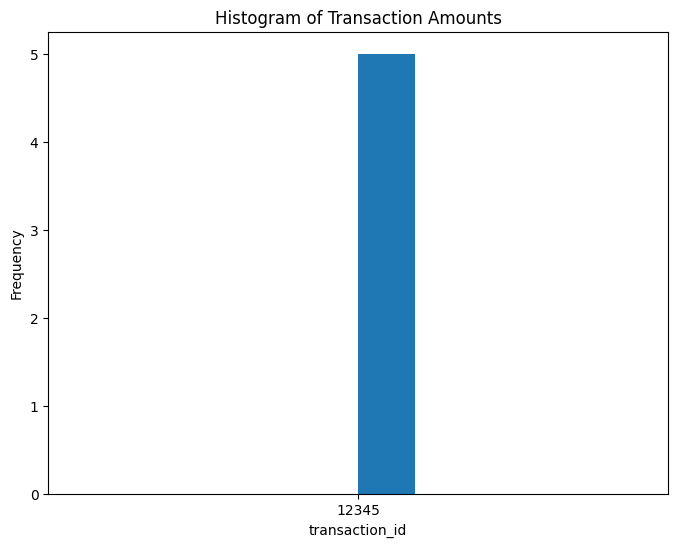

In [50]:
#Histogram of Transaction Amounts:

plt.figure(figsize=(8, 6))
plt.hist(data['transaction_id'], bins=10)
plt.xlabel('transaction_id')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')
plt.show()
